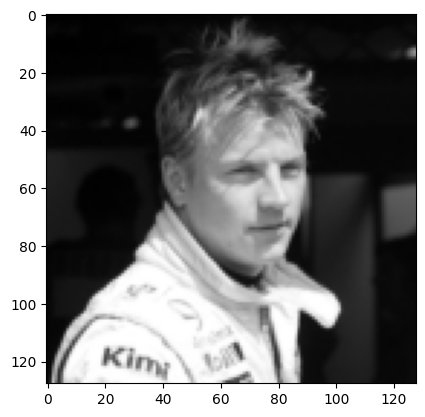

In [31]:
import matplotlib.image as matplotimg
import matplotlib.pyplot as plt
from skimage.transform import resize

#Load in the image
x=0
match(x):
  case 0: #55 Williams
    filename = 'kimi.jpg'
    num_qubits = 7
  case 1: #Square
    filename = 'square.png'
    num_qubits = 1

image = matplotimg.imread(filename)
#Crop and Center the image
image_width = image.shape[0]
image_height = image.shape[1]

half_dim = min(image_width, image_height)/2
image = image[int(image_width/2-half_dim):int(image_width/2+half_dim),
              int(image_height/2-half_dim):int(image_height/2+half_dim)] #crop it centered square
image = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2] #make it grey

#Resize into right dimensions
#The actual number of positional qubits is 2*num_qubits, and +1 for phase encoding
image = resize(image, (2**num_qubits, 2**num_qubits))

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

In [32]:
import numpy as np

#Encode it using FRQI.
image_scaled = (image - image.min()) / (image.max()-image.min())
data = np.ravel(image_scaled)
print(data)

[0.01104207 0.01072989 0.01076992 ... 0.04510953 0.04922238 0.04750164]


In [33]:
def FRQIsimulatemeasure(num_measurements=100):
  total = np.ones(len(data))
  ones = np.ones(len(data))

  for i in range(num_measurements):
    pixle = np.random.randint(0, len(data))
    if (np.random.rand() > data[pixle]):
      total[pixle] += 1
    else:
      ones[pixle] += 1
      total[pixle] += 1

  array_1d = ones/total

  return array_1d.reshape(2**num_qubits, 2**num_qubits)


In [34]:
position = ["00",'01', "10", "11"]

def NEQRsimulatemeasure(num_measurements=100):
  value = np.ones(len(data))

  for i in range(num_measurements):
    pixle = np.random.randint(0, len(data))
    value[pixle] = data[pixle]
    # print(position[pixle])


  array_1d = value

  return array_1d.reshape(2**num_qubits, 2**num_qubits)


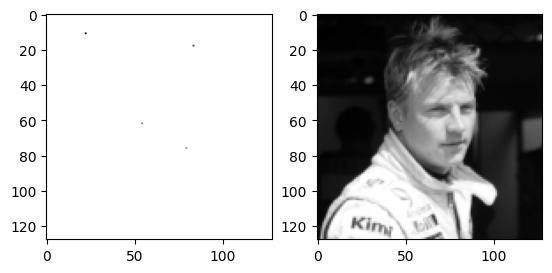

In [35]:
fig, ax = plt.subplots(1,2)
a = NEQRsimulatemeasure(4)
ax[0].imshow(a, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(image, cmap='gray')

524288


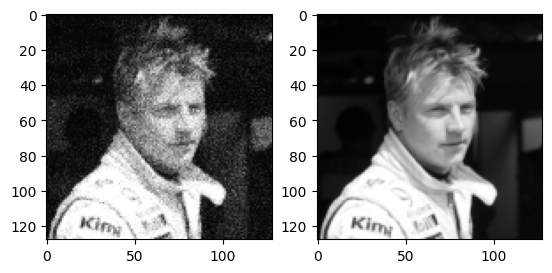

In [38]:
fig, ax = plt.subplots(1,2)
n = 32*num_pixels
print(n)
a = FRQIsimulatemeasure(n)
ax[0].imshow(a, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(image, cmap='gray')

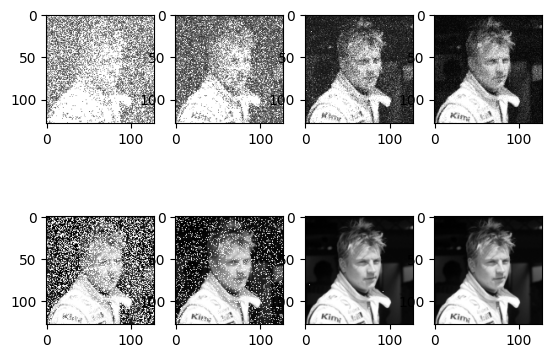

In [ ]:
measurearray=[num_pixels, 2*num_pixels, 8*num_pixels, 32*num_pixels]


fig, ax = plt.subplots(2,4)

num_pixels = (2**num_qubits) * (2**num_qubits)
ax[0][0].imshow(FRQIsimulatemeasure(measurearray[0]), cmap='gray', vmin=0, vmax=1) #With 2
ax[0][1].imshow(FRQIsimulatemeasure(measurearray[1]), cmap='gray', vmin=0, vmax=1)
ax[0][2].imshow(FRQIsimulatemeasure(measurearray[2]), cmap='gray', vmin=0, vmax=1)
ax[0][3].imshow(FRQIsimulatemeasure(measurearray[3]), cmap='gray', vmin=0, vmax=1)


ax[1][0].imshow(NEQRsimulatemeasure(measurearray[0]), cmap='gray', vmin=0, vmax=1) #With 2
ax[1][1].imshow(NEQRsimulatemeasure(measurearray[1]), cmap='gray', vmin=0, vmax=1)
ax[1][2].imshow(NEQRsimulatemeasure(measurearray[2]), cmap='gray', vmin=0, vmax=1)
ax[1][3].imshow(NEQRsimulatemeasure(measurearray[3]), cmap='gray', vmin=0, vmax=1)